In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading Data from CSV File 

In [2]:
df= pd.read_csv('microsoftstocks.csv')
print("Initial shape: ",df.shape)
print(df.head())

Initial shape:  (9369, 6)
         Date   Close    Open    High     Low    Volume
0  05/15/2023  309.46  309.10  309.90  307.59  16290000
1  05/12/2023  308.97  310.55  310.65  306.60  19770000
2  05/11/2023  310.11  310.10  311.12  306.26  31680000
3  05/10/2023  312.31  308.62  313.00  307.67  30080000
4  05/09/2023  307.00  308.00  310.04  306.31  21340000


Cleaning

In [3]:
df.drop_duplicates(inplace=True)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date 
df.sort_values('Date', inplace=True)

# Remove any rows with missing values
df.dropna(subset=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)

# Drop any rows with negative values in 'Open', 'High', 'Low', 'Close', and 'Volume' columns
df = df[(df['Open'] >= 0) & (df['High'] >= 0) & (df['Low'] >= 0) & (df['Close'] >= 0) & (df['Volume'] >= 0)]
df.reset_index(drop=True, inplace=True)

# Display the final shape of the dataset
print("Final Shape:", df.shape)

Final Shape: (9369, 6)


Save the cleaned dataset to a new CSV file


In [4]:
df.to_csv('cleaned_microsoftstocks.csv', index=False)

### Analysis of data

1. Basic Statistical Functions

In [5]:
statistics = df[['Open', 'High', 'Low', 'Close', 'Volume']].describe()
print(statistics)

              Open         High         Low        Close        Volume
count  9369.000000  9369.000000  9369.00000  9369.000000  9.369000e+03
mean     48.079601    48.599116    47.54945    48.093331  5.780523e+07
std      70.120795    70.849226    69.35664    70.144460  3.701243e+07
min       0.090000     0.090000     0.09000     0.090000  2.300000e+06
25%       5.340000     5.430000     5.25000     5.370000  3.357000e+07
50%      27.050000    27.340000    26.82000    27.090000  5.109000e+07
75%      43.450000    44.000000    42.94000    43.500000  7.168000e+07
max     344.620000   349.670000   342.20000   343.110000  7.886900e+08


2. Line Plot od stock prices over time

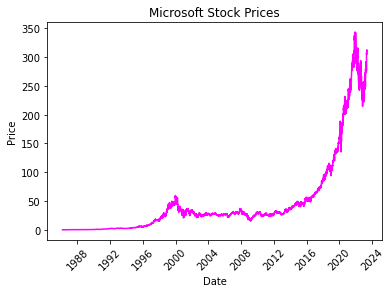

In [13]:
plt.plot(df['Date'], df['Close'],color='magenta')
plt.title('Microsoft Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

3. Moving Average

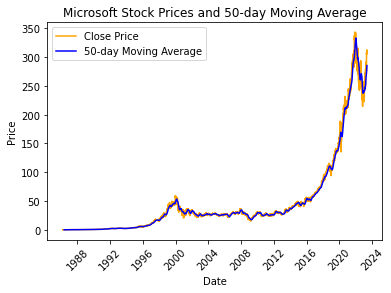

In [17]:
# 50-day moving average of 'Close' price
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Line plot of price and 50-day moving average over time
plt.plot(df['Date'], df['Close'], label='Close Price', color='orange')
plt.plot(df['Date'], df['MA_50'], label='50-day Moving Average', color='blue')
plt.title('Microsoft Stock Prices and 50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

4. Stock Returns

In [18]:
# Calculating daily returns
df['Return'] = df['Close'].pct_change()

# Calculating mean return, volatility, and skewness
mean_return = df['Return'].mean()
volatility = df['Return'].std()
skewness = df['Return'].skew()
print("Mean Return:", mean_return)
print("Volatility (Standard Deviation):", volatility)
print("Skewness:", skewness)

Mean Return: 0.001106939730401853
Volatility (Standard Deviation): 0.022254415018512885
Skewness: -0.10530375028024058


5. Trading Volume

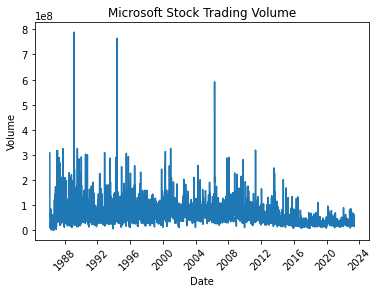

In [24]:
# Create a line plot of trading volume over time
plt.plot(df['Date'], df['Volume'])
plt.title('Microsoft Stock Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

# Analysis using Numpy

### Rolling mean of price

In [38]:
window = 30
df['Rolling_Mean'] = df['Close'].rolling(window=window).mean()
print(df['Rolling_Mean'].describe())

count    9340.000000
mean       47.774942
std        69.446712
min         0.099333
25%         5.502500
50%        27.004000
75%        43.944667
max       334.916000
Name: Rolling_Mean, dtype: float64


### Exponential moving average of price

In [27]:
alpha = 2 / (window + 1)
df['EMA'] = df['Close'].ewm(alpha=alpha).mean()

### Relative Strength Index (RSI)
The Relative Strength Index (RSI) is a technical momentum oscillator that measures the speed and change of price movements.

In [29]:
window = 14
price_diff = df['Close'].diff()
upward_price = price_diff.where(price_diff > 0, 0)
downward_price = -price_diff.where(price_diff < 0, 0)
upward_avg = upward_price.rolling(window=window).mean()
downward_avg = downward_price.rolling(window=window).mean()
rs = upward_avg / downward_avg
rsi = 100 - (100 / (1 + rs))
df['RSI'] = rsi

### Bollinger Bands

In [34]:
# Calculate upper and lower Bollinger Bands
df['Rolling_Mean'] = df['Close'].rolling(window=window).mean()
df['Rolling_Std'] = df['Close'].rolling(window=window).std()
df['Upper_Band'] = df['Rolling_Mean'] + 2 * df['Rolling_Std']
df['Lower_Band'] = df['Rolling_Mean'] - 2 * df['Rolling_Std']

In [37]:
statistics = df[['Rolling_Mean','EMA','RSI','Upper_Band', 'Lower_Band']].describe()
print(statistics)

       Rolling_Mean          EMA          RSI   Upper_Band   Lower_Band
count   9356.000000  9369.000000  9346.000000  9356.000000  9356.000000
mean      47.945682    47.634656    53.878871    50.240922    45.650443
std       69.810861    69.388101    16.455050    73.219200    66.455889
min        0.095714     0.094812     0.000000     0.100000     0.085443
25%        5.398393     5.233025    42.449790     5.728676     5.057366
50%       27.029286    27.022234    54.166667    28.271937    25.813490
75%       43.714643    43.832581    65.459526    46.127374    41.047094
max      337.389286   332.833444   100.000000   352.352392   330.925381
